# עבודה מספר 6 - רגרסיה ליניארית

אפשר לדבר על הגרף בשאלה 2 סעיף 3 - הכי טוב יהיה לייצר מישור רציף, לשפץ אותם קצת כותרות וזה

# חלק א' - מחירי יהלומים

In [1]:
#Create a folder in google's cloud for my stuff
!mkdir /root/.kaggle/ 

In [2]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"shaharoded","key":"47649d0e189bb2974572b495b853facb"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# searching for the dataset
!kaggle datasets list -s diamonds

ref                                                        title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
shivam2503/diamonds                                        Diamonds                                           733KB  2017-05-25 03:06:57          44998  
miguelcorraljr/brilliant-diamonds                          Brilliant Diamonds                                   1MB  2020-12-14 04:18:52            662  
resulcaliskan/diamonds                                     diamonds                                           582KB  2021-05-15 10:46:58             78  
dysphoria/poker-hand-classification                        Poker Hand Classification                            7MB  2018-11-13 17:47:22            614  
kalilurrahman/berkshire-hathaway-stock-latest-and-updated  Berkshire Hathawa

In [4]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/diamonds

# download the dataset from Kaggle and unzip it
!kaggle datasets download shivam2503/diamonds  -f diamonds.csv -p ./datasets/diamonds/

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 23.5MB/s]


In [5]:
#Unzip 
!unzip ./datasets/diamonds/diamonds.csv.zip  -d ./datasets/diamonds/

Archive:  ./datasets/diamonds/diamonds.csv.zip
  inflating: ./datasets/diamonds/diamonds.csv  


In [6]:
#pick libraries I want to use
import pandas as pd
import numpy as np
import regex as re
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import metrics

In [7]:
#create objects to work on (table) - paste the link of the files from the folder in the left
diamonds_full_db = pd.read_csv("/content/datasets/diamonds/diamonds.csv")
diamonds_full_db

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# שאלה 1
חשבון קורלציית פירסון בין ערך הקראט של יהלום לערך הdepth


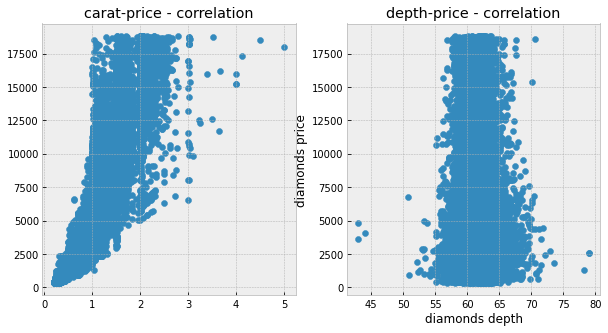

In [51]:
figure, axis = plt.subplots(1,2)

#first, a scatter between the carat of a diamond and it's price
plt.rcParams['figure.figsize'] = [5,5]
axis[0].scatter(diamonds_full_db['carat'], diamonds_full_db['price'])
plt.xlabel("diamond carat value")
plt.ylabel("diamonds price")
axis[0].set_title("carat-price - correlation")

#second, a scatter between the depth of a diamond and it's price

axis[1].scatter(diamonds_full_db['depth'], diamonds_full_db['price'])
plt.xlabel("diamonds depth")
plt.ylabel("diamonds price")
axis[1].set_title("depth-price - correlation")

plt.show()

In [9]:
#and for the correlation between the two parameters
corr, _ = pearsonr(diamonds_full_db['carat'], diamonds_full_db['price'])
print('Pearsons correlation between the diamond carat and its price: %.3f' % corr)
if corr >= 0.5 or corr <= -0.5:
  print('not bad..')
else:
  print('not very significant...')

Pearsons correlation between the diamond carat and its price: 0.922
not bad..


In [10]:
#and for the correlation between the two parameters
corr, _ = pearsonr(diamonds_full_db['depth'], diamonds_full_db['price'])
print('Pearsons correlation between the diamond depth and its price: %.3f' % corr)
if corr >= 0.5 or corr <= -0.5:
  print('not bad..')
else:
  print('not very significant...')

Pearsons correlation between the diamond depth and its price: -0.011
not very significant...


# שאלה 2
ציירו מטריצה הבודקת קורלציה בין כל העמודות הנומריות בקובץ

In [11]:
cols = ["price", "carat", "depth", "table","x", "y", "z"]
df = diamonds_full_db[cols]
corr = df.corr()
corr

,price,carat,depth,table,x,y,z
price,1.000000,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.010647,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.127134,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


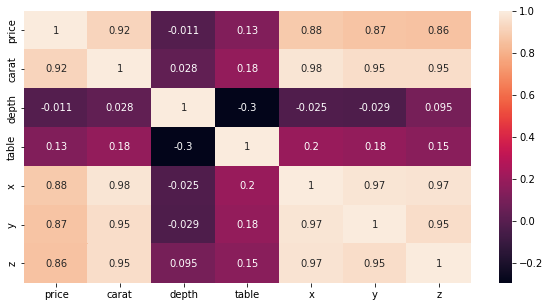

In [12]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot=True)
#we can see high correlation between x,y,z, and carat to the price

# שאלה 3
עבור כל סוג "בהירות" צור מודל רגרסיה ליניארית החוזה את מחיר היהלום באמצעות נתון הקראט שלו

In [13]:
#first, let's check how many clarity groups we have
list1 = []
for i in diamonds_full_db.clarity:
  list1.append(i)
set1 = set(list1)
set1

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [14]:
#lets create the base function
def linear_regression_generator(clarity):
  func_df = diamonds_full_db.loc[diamonds_full_db['clarity'] == clarity]
  linreg = LinearRegression()
  sqrt_list_of_list = [[i] for i in func_df['carat'].values] 
  linreg.fit(sqrt_list_of_list, func_df['price'].values)
  b_0 = round(float(linreg.coef_),2)
  b_1 = round(float(linreg.intercept_),2)
  return f'The linear regression modely for clarity level {clarity} is: y = {b_0}x + {b_1}'
 


In [15]:
#and for the results:
print('regression model of the dependance between a diamonds carat and its price - by clarity degree:')
for i in set1:
  print(linear_regression_generator(str(i)))


regression model of the dependance between a diamonds carat and its price - by clarity degree:
The linear regression modely for clarity level VVS2 is: y = 10077.19x + -2724.3
The linear regression modely for clarity level VVS1 is: y = 10469.25x + -2746.28
The linear regression modely for clarity level SI1 is: y = 8090.35x + -2884.7
The linear regression modely for clarity level VS1 is: y = 9000.73x + -2705.5
The linear regression modely for clarity level I1 is: y = 4209.79x + -1480.56
The linear regression modely for clarity level SI2 is: y = 7870.26x + -3418.34
The linear regression modely for clarity level VS2 is: y = 8626.16x + -2664.83
The linear regression modely for clarity level IF is: y = 11625.44x + -3007.44


The linear regression model for clarity level VVS2 is: y=10077.19x + -2724.3
The linear regression model for clarity level VVS1 is: y=10469.25x + -2746.28
The linear regression model for clarity level SI1 is: y=8090.35x + -2884.7
The linear regression model for clarity level VS1 is: y=9000.73x + -2705.5
The linear regression model for clarity level I1 is: y=4209.79x + -1480.56
The linear regression model for clarity level SI2 is: y=7870.26x + -3418.34
The linear regression model for clarity level VS2 is: y=8626.16x + -2664.83
The linear regression model for clarity level IF is: y=11625.44x + -3007.44


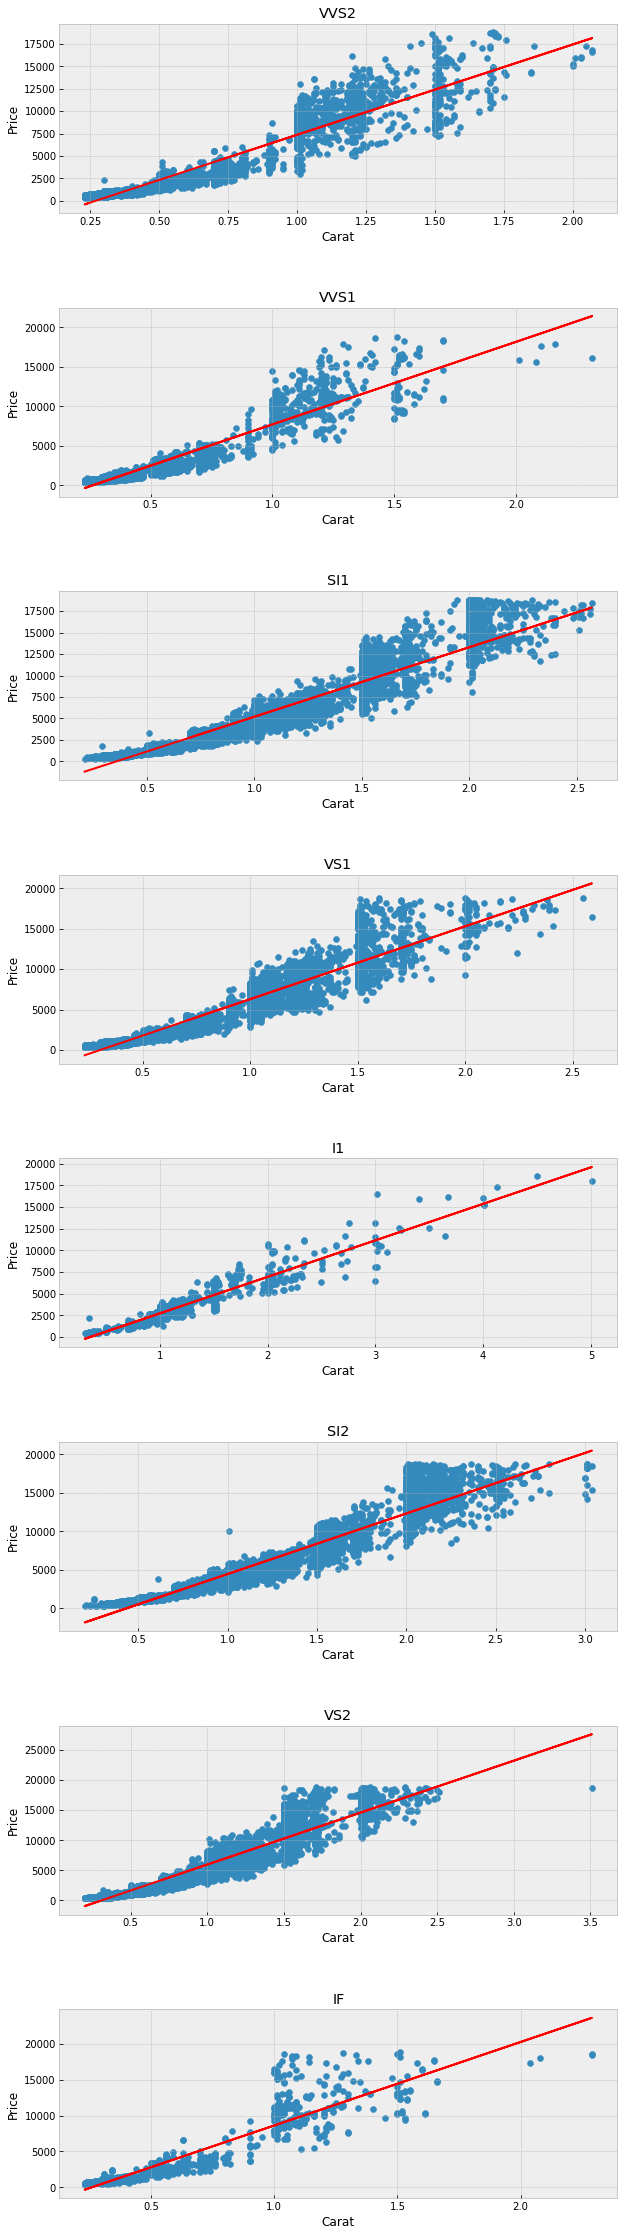

In [52]:
#Example with graphs
clarity_list = list(set(diamonds_full_db.clarity.values))
fig, ax = plt.subplots(len(clarity_list))
fig.set_size_inches(10, 40)
fig.subplots_adjust(hspace=0.5)

for clarity_type_index in range(len(clarity_list)):
  clarity_df = diamonds_full_db[["price","price","clarity"]]
  clarity_df = diamonds_full_db[diamonds_full_db["clarity"] == clarity_list[clarity_type_index]]
  linreg = LinearRegression()
  carat_list_of_list = [[i] for i in clarity_df['carat'].values] 
  linreg.fit(carat_list_of_list, clarity_df['price'].values)
  linear_func = lambda x: linreg.coef_*x + linreg.intercept_
  predict_price_values = [linear_func(x) for x in clarity_df['carat']]
  ax[clarity_type_index].scatter(list(clarity_df["carat"]), list(clarity_df["price"]))
  ax[clarity_type_index].set_xlabel('Carat')
  ax[clarity_type_index].set_ylabel('Price')
  ax[clarity_type_index].set_title(clarity_list[clarity_type_index])
  ax[clarity_type_index].plot(clarity_df['carat'],predict_price_values, color='red')
  print(f"The linear regression model for clarity level {clarity_list[clarity_type_index]} is: y={round(float(linreg.coef_),2)}x + {round(float(linreg.intercept_),2)}")

# שאלה 4
עבור כל אחד מהמודלים צור גרף ליניארי במערכת אחת המציג את מחיר היהלום הצפוי כתלות בערך הקראט שלו

In [16]:
#adjusting the function a little
def linear_regression_generator1(clarity):
  func_df = diamonds_full_db.loc[diamonds_full_db['clarity'] == clarity]
  linreg = LinearRegression()
  sqrt_list_of_list = [[i] for i in func_df['carat'].values] 
  linreg.fit(sqrt_list_of_list, func_df['price'].values)
  b_0 = round(float(linreg.coef_),2)
  b_1 = round(float(linreg.intercept_),2)
  return [b_0,b_1]

In [17]:
#creating LAMBDA functions for each
I1 = lambda x: linear_regression_generator1("I1")[0]*x + linear_regression_generator1("I1")[1]
IF = lambda x: linear_regression_generator1("IF")[0]*x + linear_regression_generator1("IF")[1]
SI1 = lambda x: linear_regression_generator1("SI1")[0]*x + linear_regression_generator1("SI1")[1]
SI2 = lambda x: linear_regression_generator1("SI2")[0]*x + linear_regression_generator1("SI2")[1]
VS1 = lambda x: linear_regression_generator1("VS1")[0]*x + linear_regression_generator1("VS1")[1]
VS2 = lambda x: linear_regression_generator1("VS2")[0]*x + linear_regression_generator1("VS2")[1]
VVS1 = lambda x: linear_regression_generator1("VVS1")[0]*x + linear_regression_generator1("VVS1")[1]
VVS2 = lambda x: linear_regression_generator1("VVS2")[0]*x + linear_regression_generator1("VVS2")[1]

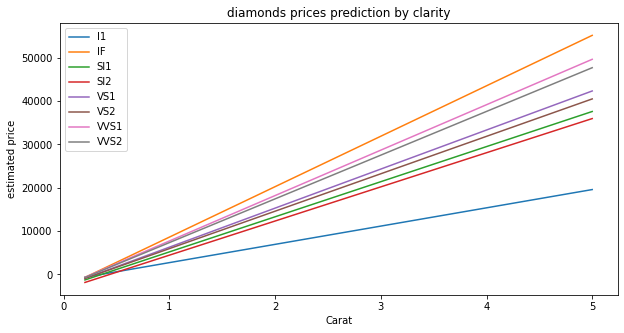

In [18]:
#And for the artsy part
X = np.arange(0.2, 5.01, 0.01)
y1 = I1(X)
y2 = IF(X)
y3 = SI1(X)
y4 = SI2(X)
y5 = VS1(X)
y6 = VS2(X)
y7 = VVS1(X)
y8 = VVS2(X)
plt.figure(figsize=(10,5))
plt.plot(X, y1, label='I1')
plt.plot(X, y2, label='IF')
plt.plot(X, y3, label='SI1')
plt.plot(X, y4, label='SI2')
plt.plot(X, y5, label='VS1')
plt.plot(X, y6, label='VS2')
plt.plot(X, y7, label='VVS1')
plt.plot(X, y8, label='VVS2')

plt.xlabel("Carat")
plt.ylabel("estimated price")
plt.title("diamonds prices prediction by clarity")

plt.legend()
  
plt.show()

# שאלה 5
חלקו את הנתונים לקובץ אימון וקובץ מבחן וצרו קורלצייה מרובת משתנים החוזה את מחיר היהלום באמצעות כל העמודות הנומריות בקובץ

In [59]:
#First lets create the train and test files
train_df = diamonds_full_db[:int(len(diamonds_full_db)*0.2)]
test_df = diamonds_full_db[int(len(diamonds_full_db)*0.2):len(diamonds_full_db)]
mlinreg = LinearRegression()

data_values_list = []
data_points_list = [row.values for index, row in  train_df[['carat', 'depth', 'table', 'x', 'y', 'z']].iterrows()]
mlinreg.fit(data_points_list, train_df['price'].values)


LinearRegression()

*לכן*, הישר הסופי שלנו הוא:

In [60]:
array = mlinreg.coef_ # coefficent b_0
mlinreg.intercept_ # b_1
print(f'PRICE = {round(array[0],2)} * carat + {round(array[1],2)} * depth + {round(array[2],2)} * table + {round(array[3],2)} * x + {round(array[4],2)} * y + {round(array[5],2)} * z +{round(mlinreg.intercept_,2)}')


PRICE = -3009.52 * carat + 87.34 * depth + 5.65 * table + 145.85 * x + 2372.05 * y + 256.13 * z +-15761.66


In [62]:
#lets test out model
from sklearn import metrics
import math
y_test = test_df['price'].values
y_pred = mlinreg.predict([v for v in test_df[['carat', 'depth', 'table', 'x', 'y', 'z']].values])
MAE = metrics.mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(metrics.mean_squared_error(y_test,y_pred))

print(f'The models MAE is: {MAE} and the models RMSE is: {RMSE}')
print(f'using the MAE error calc model, our prediction might not be accurate by {round(MAE,2)}$')

The models MAE is: 1893.9793173261892 and the models RMSE is: 3410.073281782449
using the MAE error calc model, our prediction might not be accurate by 1893.98$


# חלק ב' - נתוני מכירת רכבים בארצות הברית

In [24]:
# searching for the dataset
!kaggle datasets list -s cars

ref                                               title                                         size  lastUpdated          downloadCount  
------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
austinreese/craigslist-carstrucks-data            Used Cars Dataset                            262MB  2021-05-06 17:14:08          39545  
doaaalsenani/usa-cers-dataset                     US Cars Dataset                               66KB  2020-04-22 14:38:05          15911  
jessicali9530/stanford-cars-dataset               Stanford Cars Dataset                          2GB  2018-06-05 03:11:16          14882  
gidutz/autotel-shared-car-locations               Shared Cars Locations                        115MB  2020-02-25 14:24:53           3970  
lepchenkov/usedcarscatalog                        Used-cars-catalog                            824KB  2019-12-02 12:02:05           4500  
abineshkumark/carsdata     

In [25]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/cars

# download the dataset from Kaggle and unzip it
!kaggle datasets download doaaalsenani/usa-cers-dataset   -f USA_cars_datasets.csv -p ./datasets/cars/


mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/278k [00:00<?, ?B/s]
100% 278k/278k [00:00<00:00, 73.8MB/s]


In [26]:
#Unzip 
!unzip ./datasets/cars/USA_cars_datasets.csv.zip  -d ./datasets/cars/

unzip:  cannot find or open ./datasets/cars/USA_cars_datasets.csv.zip, ./datasets/cars/USA_cars_datasets.csv.zip.zip or ./datasets/cars/USA_cars_datasets.csv.zip.ZIP.


In [27]:
#create objects to work on (table) - paste the link of the files from the folder in the left
cars_full_db = pd.read_csv("/content/datasets/cars/USA_cars_datasets.csv")
cars_full_db

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


# שאלה 1
עבור כל רכבי הדודג' והאאודי בנו מודל רגרסיה ליניארית פשוט המנבא את מחיר הרכב כתלות בקילומטראז שלו


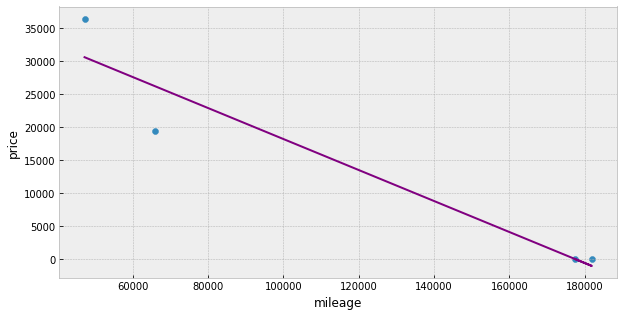

In [28]:
#audi cars df

audi_df = cars_full_db.loc[cars_full_db['brand'] == "audi"]

#creating the liniar regression

linreg = LinearRegression()
sqrt_list_of_list = [[i] for i in audi_df['mileage'].values] 
linreg.fit(sqrt_list_of_list, audi_df['price'].values)
linreg.coef_ # coefficent b_0
linreg.intercept_ # b_1

linear_func = lambda x: linreg.coef_[0]*x + linreg.intercept_
predict_audi_values = [linear_func(x) for x in audi_df['mileage']]

#creating the visualization
plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.scatter(audi_df['mileage'], audi_df['price'])
plt.xlabel("mileage")
plt.ylabel("price")

plt.plot(audi_df['mileage'],predict_audi_values, color='purple' )
 

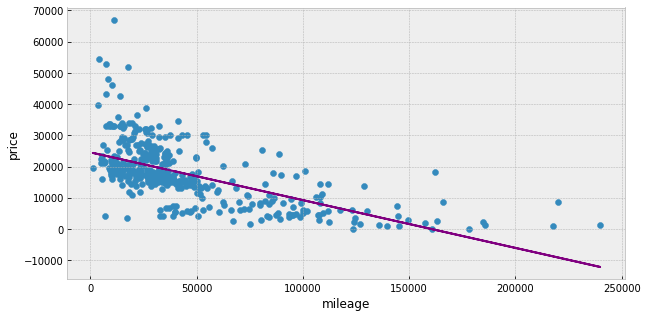

In [29]:
#dodge cars df

dodge_df = cars_full_db.loc[cars_full_db['brand'] == "dodge"]

#creating the liniar regression

linreg = LinearRegression()
sqrt_list_of_list = [[i] for i in dodge_df['mileage'].values] 
linreg.fit(sqrt_list_of_list, dodge_df['price'].values)
linreg.coef_ # coefficent b_0
linreg.intercept_ # b_1

linear_func = lambda x: linreg.coef_[0]*x + linreg.intercept_
predict_y_values = [linear_func(x) for x in dodge_df['mileage']]

#creating the visualization
plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.scatter(dodge_df['mileage'], dodge_df['price'])
plt.xlabel("mileage")
plt.ylabel("price")

plt.plot(dodge_df['mileage'],predict_y_values, color='purple' )

# שאלה 2
עבור כל רכבי פורד בנו מודל רגרסיה מרובת משתנים המחשבת את מחיר הרכב לפי קילומטראז ושנת ייצור

In [63]:
#Ford cars df
df = cars_full_db[["mileage","year","price"]]
ford_df = df[cars_full_db['brand'] == "ford"]

#creating the liniar regression

model = LinearRegression()
data_points_list = [row.values for index, row in  ford_df[["mileage","year"]].iterrows()]
model.fit(data_points_list, ford_df['price'].values)

b_0 = model.coef_ 
b_1 = model.intercept_

linear_func = lambda x,y: model.coef_[0]*x + model.coef_[1]*y + model.intercept_
print(f'CAR PRICE = {round(model.coef_[0],2)} * mileage + {round(model.coef_[1],2)} * year + {round(model.intercept_,2)}')
#Test
#print(linear_func(1000000,1970))

CAR PRICE = -0.06 * mileage + 1232.07 * year + -2460018.23


# שאלה 3
ציירו את המודל שהתקבל בדו מימד ובתלת מימד

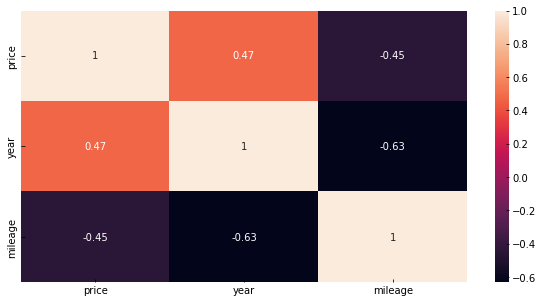

In [31]:
#first lets look at the correlation between these attributes

cols = ["price", "year", "mileage"]
df = ford_df[cols]
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot=True)

In [32]:
#lets create a scatter of the price prediction for each excisting row in our DB
import plotly.express as px
#creating 2 ranges for the axes
#X = mileage
#Y = Year
mileage = ford_df["mileage"]
year = ford_df["year"]
estimated_price = linear_func(mileage,year)


In [33]:
#2 dimentional visualization
fig = px.scatter(x=mileage, y=year, color=estimated_price)


fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
#and a visualization for each possible combination of mileage-year
#2 dimentional visualization
import plotly.graph_objects as go
year_range = list(range(1970,2021))
mileage_range = list(range(0,1000000,10000))
prediction = []
sub_list = []
for i in year_range:
  for j in mileage_range:
    sub_list.append(int(linear_func(j,i)))
  prediction.append(sub_list)
  sub_list = []
prediction

In [35]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=prediction,
                   x=mileage_range,
                   y=year_range,
                   hoverongaps = False))

fig.show()

In [64]:
df_predict = ford_df

prediction_array = []
mileage_array = df_predict.mileage.values
year_array = df_predict.year.values

model = LinearRegression()
data_points_list = [row.values for index, row in  ford_df[["mileage","year"]].iterrows()]
model.fit(data_points_list, ford_df['price'].values)
linear_func = lambda x,y: model.coef_[0]*x + model.coef_[1]*y + model.intercept_

for i in range(len(df_predict)):
  prediction_array.append(linear_func(mileage_array[i],year_array[i]))

df_predict['price_predict'] = prediction_array
fig = px.scatter_3d(df_predict, x='mileage', y='year', z='price_predict')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# חלק ג' - נתוני המיליארדרים לפי מגזין פורבס

In [37]:
# searching for the dataset
!kaggle datasets list -s forbes


ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
roysouravcu/forbes-billionaires-of-2021                     Forbes Billionaires of 2021                        53KB  2021-05-17 08:59:44           2046  
alexanderbader/forbes-billionaires-2021-30                  Forbes Billionaires 2021 3.0                      114KB  2021-05-10 06:49:17           1085  
alexanderbader/forbes-billionaires-of-2021-20               Forbes Billionaires of 2021 2.0                    88KB  2021-05-07 11:55:00            932  
chris95cam/forbes-americas-top-colleges-2019                America's Top College Rankings 2019 (Forbes)       32KB  2020-08-07 01:14:31           1624  
parulpandey/forbes-highest-paid-athletes-19902019           Forbes Highest P

In [38]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/billionairs

# download the dataset from Kaggle and unzip it
!kaggle datasets download roysouravcu/forbes-billionaires-of-2021    -f Billionaire.csv -p ./datasets/billionairs/

mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 64.7MB/s]


In [39]:
#create objects to work on (table) - paste the link of the files from the folder in the left
billionairs_full_db = pd.read_csv("/content/datasets/billionairs/Billionaire.csv")
billionairs_full_db

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


# שאלה 1
עבור תעשיות בשווי של יותר מ3 מיליארד דולר, הצג קורלציה בין גיל המיליארדר לבין ההון שלו

In [40]:
#first lets filter out the industries with less than 3B$ in total

#let's translate the networth to a float value
def networth(text):
  pattern1 = re.compile("(\d+\.\d+)")
  pattern2 = re.compile("(\d+)")
  new_text = pattern1.findall(text)
  if new_text == []:
    new_text = pattern2.findall(text)
  return float(new_text[0])
billionairs_full_db['networth'] = billionairs_full_db.NetWorth.apply(networth)
billionairs_full_db = billionairs_full_db.dropna(axis=0)

billionairs_full_db

,Name,NetWorth,Country,Source,Rank,Age,Industry,networth
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0


In [41]:
df = billionairs_full_db[['Industry','networth']]
industry_worth = df.groupby(['Industry'], as_index = False).sum()
industry_worth
#no industries with total worth of less than 3B$

,Industry,networth
0,Automotive,465.3
1,Construction & Engineering,120.5
2,Diversified,832.0
3,Energy,451.0
4,Fashion & Retail,1686.0
5,Finance & Investments,1511.6
6,Food & Beverage,975.7
7,Gambling & Casinos,134.0
8,Healthcare,778.0
9,Logistics,145.8


In [42]:
#creating an industry list to go over iteratively
industry_list = []
for i in billionairs_full_db.Industry:
  industry_list.append(i)
industry_set = set(industry_list)


In [43]:
#lets create the correlation function
def correlation_generator(industry):
  func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == industry]
  corr, _ = pearsonr(func_df['Age'], func_df['networth'])
  return f'in the {industry} industry: { corr}'


In [44]:
#and for the results:
print('Pearsons correlation model of the dependance between a Age and networth by industry:')
for i in industry_set:
  print(correlation_generator(i))

Pearsons correlation model of the dependance between a Age and networth by industry:
in the Media & Entertainment industry: 0.12850823856871332
in the Food & Beverage industry: 0.04430911460873656
in the Service industry: -0.0836579903981067
in the Logistics industry: 0.24297075134898655
in the Energy industry: -0.11388471190439049
in the Finance & Investments industry: 0.1018847137662265
in the Gambling & Casinos industry: 0.1707096426782739
in the Healthcare industry: 0.147897335064573
in the Automotive industry: -0.11801409354404599
in the Fashion & Retail industry: 0.1370902950597583
in the Construction & Engineering industry: 0.3689966097569561
in the Sports industry: 0.3152713310510645
in the Manufacturing industry: 0.1688542551151315
in the Technology industry: -0.011474370518347085
in the Real Estate industry: 0.08649722363646473
in the Telecom industry: 0.21915053405577467
in the Diversified industry: 0.03964718398447836
in the Metals & Mining industry: 0.25601785458914694


# שאלה 2
הצג את הקורלציה באופן גרפי

In [45]:
#some adjustments in the function
industry_corr_dict = {}
def correlation_generator2(industry):
  func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == industry]
  corr, _ = pearsonr(func_df['Age'], func_df['networth'])
  return corr


In [46]:
industry_corr_dict = {}
corr_list = []
for i in industry_set:
  industry_corr_dict[i] = correlation_generator2(i)
for i in industry_corr_dict.values():
  corr_list.append(i)
industry_corr_dict
corr_list

[0.12850823856871332,
 0.04430911460873656,
 -0.0836579903981067,
 0.24297075134898655,
 -0.11388471190439049,
 0.1018847137662265,
 0.1707096426782739,
 0.147897335064573,
 -0.11801409354404599,
 0.1370902950597583,
 0.3689966097569561,
 0.3152713310510645,
 0.1688542551151315,
 -0.011474370518347085,
 0.08649722363646473,
 0.21915053405577467,
 0.03964718398447836,
 0.25601785458914694]

In [47]:
#implementation of insertion sort on corr_list
def insertion_sort_reverse(lst):
  for i in range(1,len(lst)):
    value = lst[i]
    j = i-1
    while j>=0 and lst[j]<value:
      lst[j+1] = lst[j]
      j = j - 1
    lst[j+1] = value
corr_list

[0.12850823856871332,
 0.04430911460873656,
 -0.0836579903981067,
 0.24297075134898655,
 -0.11388471190439049,
 0.1018847137662265,
 0.1707096426782739,
 0.147897335064573,
 -0.11801409354404599,
 0.1370902950597583,
 0.3689966097569561,
 0.3152713310510645,
 0.1688542551151315,
 -0.011474370518347085,
 0.08649722363646473,
 0.21915053405577467,
 0.03964718398447836,
 0.25601785458914694]

In [48]:
#lets sort the list of industries from high corr to low
sorted_industry_list = []
index = 0
for key in industry_corr_dict.keys():
  for key in industry_corr_dict.keys():
    if  industry_corr_dict[key] == corr_list[index]:
      sorted_industry_list.append(key)
  index = index + 1
sorted_industry_list


['Media & Entertainment',
 'Food & Beverage',
 'Service',
 'Logistics',
 'Energy',
 'Finance & Investments',
 'Gambling & Casinos',
 'Healthcare',
 'Automotive',
 'Fashion & Retail',
 'Construction & Engineering',
 'Sports',
 'Manufacturing',
 'Technology',
 'Real Estate',
 'Telecom',
 'Diversified',
 'Metals & Mining']

Text(0.5, 1.0, 'Metals & Mining')

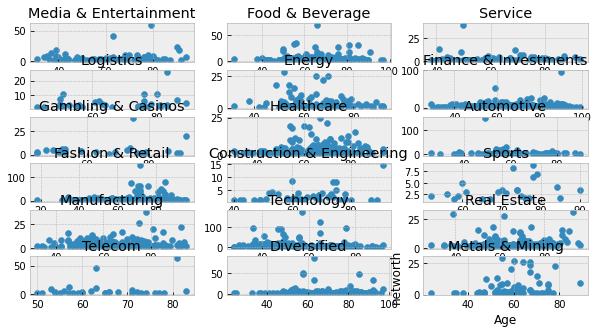

In [49]:
#creating the subplots showing the scatter chart in each industry
figure, axis = plt.subplots(6,3)
plt.rcParams['figure.figsize'] = [20,20]

##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[0]]
axis[0,0].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[0,0].set_title(str(sorted_industry_list[0]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[1]]
axis[0,1].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[0,1].set_title(str(sorted_industry_list[1]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[2]]
axis[0,2].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[0,2].set_title(str(sorted_industry_list[2]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[3]]
axis[1,0].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[1,0].set_title(str(sorted_industry_list[3]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[4]]
axis[1,1].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[1,1].set_title(str(sorted_industry_list[4]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[5]]
axis[1,2].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[1,2].set_title(str(sorted_industry_list[5]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[6]]
axis[2,0].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[2,0].set_title(str(sorted_industry_list[6]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[7]]
axis[2,1].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[2,1].set_title(str(sorted_industry_list[7]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[8]]
axis[2,2].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[2,2].set_title(str(sorted_industry_list[8]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[9]]
axis[3,0].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[3,0].set_title(str(sorted_industry_list[9]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[10]]
axis[3,1].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[3,1].set_title(str(sorted_industry_list[10]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[11]]
axis[3,2].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[3,2].set_title(str(sorted_industry_list[11]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[12]]
axis[4,0].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[4,0].set_title(str(sorted_industry_list[12]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[13]]
axis[4,1].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[4,1].set_title(str(sorted_industry_list[13]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[14]]
axis[4,2].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[4,2].set_title(str(sorted_industry_list[14]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[15]]
axis[5,0].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[5,0].set_title(str(sorted_industry_list[15]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[16]]
axis[5,1].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[5,1].set_title(str(sorted_industry_list[16]))
##############################################################################################
func_df = billionairs_full_db.loc[billionairs_full_db['Industry'] == sorted_industry_list[17]]
axis[5,2].scatter(func_df['Age'], func_df['networth'])
plt.xlabel("Age")
plt.ylabel("networth")
axis[5,2].set_title(str(sorted_industry_list[17]))